In [1]:
# In SVM, the error line bwteen predicted and actual is perpendicular, where as in in Linear regression it is  normal y2-y1(and also, it will be affected by outliers and will shift its line,)
# where as in SVM , it will discard the outliers

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
m1,cov1 = np.array([1,5]) , np.array([[1,0.1],[0.1,1]])
                                      
m2,cov2 = np.array([4,5.2]) , np.array([[1,0.1],[0.1,1.2]])
                                        
dist1 = np.random.multivariate_normal(m1,cov1,500)
dist2 = np.random.multivariate_normal(m2,cov2,500)
                                        
print(dist1.shape,dist2.shape)                                        

(500, 2) (500, 2)


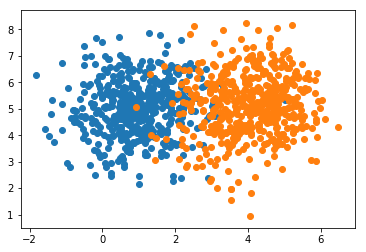

In [23]:
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])
plt.show()

In [24]:
data = np.zeros((1000,3))

data[:500,:2] = dist1

data[500:,:2] = dist2

data[500:,-1] = 1

print(data.shape)

(1000, 3)


In [25]:
np.random.shuffle(data)
data[:10]

array([[ 4.38921617,  5.57583443,  1.        ],
       [ 6.47283669,  4.31820799,  1.        ],
       [ 0.60641096,  5.83560483,  0.        ],
       [ 0.87159478,  3.6945559 ,  0.        ],
       [ 5.08426284,  3.54516928,  1.        ],
       [ 2.7884917 ,  5.87014098,  0.        ],
       [ 0.14974914,  5.90002692,  0.        ],
       [ 1.26068735,  4.61510288,  0.        ],
       [-0.15348327,  4.09814529,  0.        ],
       [ 0.46278277,  4.67019628,  0.        ]])

In [26]:
split = 700

X_train = data[:split,:2]
X_test = data[split:,:2]

y_train = data[:split,-1]
y_test = data[split:,-1]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(700, 2) (700,)
(300, 2) (300,)


In [31]:
def sigmoid(z):
    
    return 1.0/(1+np.exp(-1*z))

def hypothesis(X,W,b):  #b is intercept theta0
    h = (X*W).sum() +b
    return sigmoid(h)

# Binary cross-Entropy
def log_likelihood(X,W,b,y_true):
    total = 0.0 
    m = X.shape[0]
    
    for i in range(m):
        if y_true[i] ==0:
            total+= np.log(1-hypothesis(X[i],W,b))
            
        else:
            total += np.log(hypothesis(X[i],W,b))
    
    total /=m
    return total

In [32]:
def gradient_ascent(X,W,b,y_true,learning_rate=0.1):# here W has 2 values as we have 2 features and w[0] = b
    
    gradW = np.zeros(2)
    gradB = 0.0
    
    m = X.shape[0]
    
    for i in range(m):
        gradW += (y_true[i] - hypothesis(X[i],W,b)) * (X[i])
        gradB +=  (y_true[i] - hypothesis(X[i],W,b)) #theta0
    
    gradW /=m
    gradB /=m
    
    W+=learning_rate * gradW
    b+=learning_rate * gradB
    
    logs = log_likelihood(X,W,b,y_true)
    return W,b,logs
    

In [35]:
W = np.array([0.5,0.5])
b = 4.2

log_likes = []

for i in range(200):
    W,b,logs = gradient_ascent(X_train,W,b,y_train,learning_rate=0.1)
    log_likes.append(logs)
    
print(W)
print(b)

[ 2.05906229 -1.54409669]
3.128140325116079


-0.27617523190152604


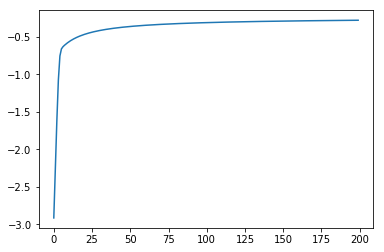

In [36]:
print(log_likes[-1])
plt.plot(log_likes)
plt.show()

In [37]:
def predict(x_sample,W,b):
    conf = hypothesis(x_sample,W,b)
    
    if conf >0.5:
        return 1
    else:
        return 0

In [38]:
def score(X_test,y_test,W,b):
    
    preds = []
    m = X_test.shape[0]
    
    for i in range(m):
        p = predict(X_test[i],W,b)
        preds.append(p)
    preds = np.asarray(preds)
    
    return 100 * (preds ==y_test).sum() /m
    
    

In [39]:
score(X_test,y_test,W,b)

91.0

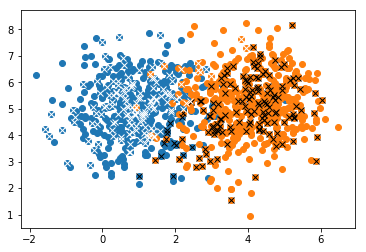

In [45]:
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])

m = X_test.shape[0]
    
for i in range(m):
    x = X_test[i]
    p = predict(x,W,b)
    if p==0:
        plt.plot(x[0],x[1],'wx')
    else:
        plt.plot(x[0],x[1],'kx')
plt.show()